### Installing packages

In [208]:
#import sys
#!{sys.executable} -m pip install geopandas

# Wildfire Data Visualizations
#### Authors: Vivian Luong, Saadia Karim, Joya Monishi

## Library imports

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
#sns.set_palette(sns.color_palette("Set1"))
sns.set_palette("pastel")
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings(action='ignore')

# EDA

In [6]:
df = pd.read_csv("capstone-accenture/clean_data/fireClimateHumanTable.csv")

In [7]:
df.head()

,time,latitude,longitude,county,year,count,2m_temperature,total_precipitation,low_vegetation_cover,high_vegetation_cover,10m_wind_speed,volumetric_soil_water_layer_1,total_cloud_cover,housingdensity,population
0,2013-01-01,37.50,-121.50,Santa Clara,2013,0,280.496376,0.000915,0.334668,0.638011,1.697441,0.354018,0.361623,643833,1866425
1,2013-01-01,39.75,-120.75,Sierra,2013,0,272.060490,0.001513,0.033286,0.965229,2.736098,0.461950,0.426258,2342,3028
2,2013-01-01,42.00,-117.00,Humboldt,2013,0,267.486433,0.001155,0.688277,0.296210,1.784445,0.246895,0.571426,62181,134403
3,2013-01-01,38.00,-119.50,Mariposa,2013,0,272.281423,0.001449,0.370655,0.609711,1.914946,0.411610,0.329985,10315,17809
4,2013-01-01,38.50,-122.25,Napa,2013,0,280.289093,0.000624,0.033250,0.966750,1.683630,0.341484,0.390741,55110,139580


In [16]:
#df.info()

In [15]:
print("Unique counties:", len(df.county.unique()))
print("\nFire value counts")
df['count'].value_counts()

Unique counties: 56

Fire value counts


0     3901
1      494
2      158
3       69
4       40
5       22
6       10
7        5
8        3
12       2
Name: count, dtype: int64

### *Features over time

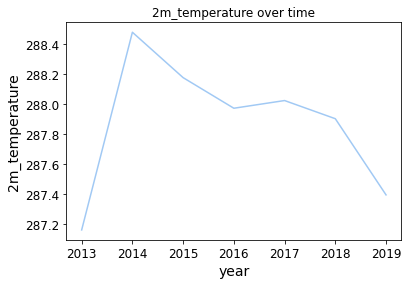

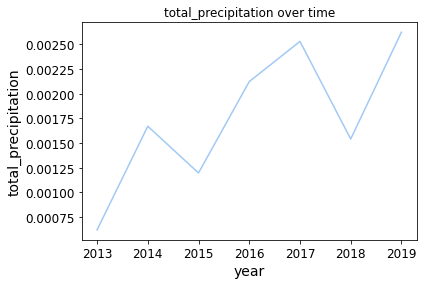

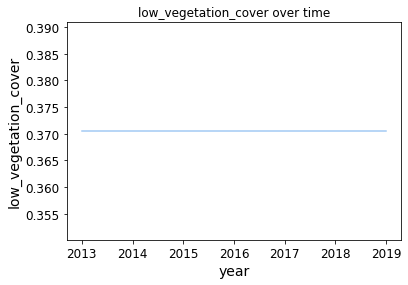

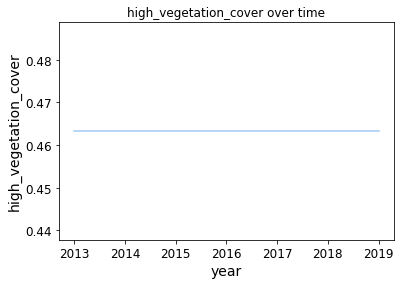

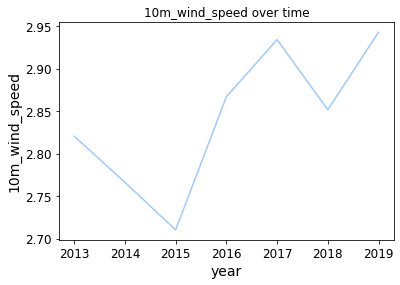

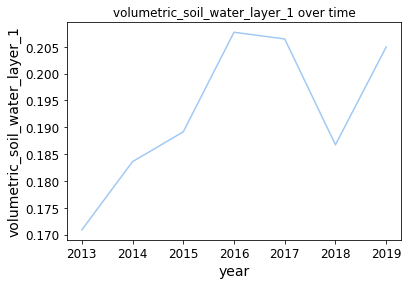

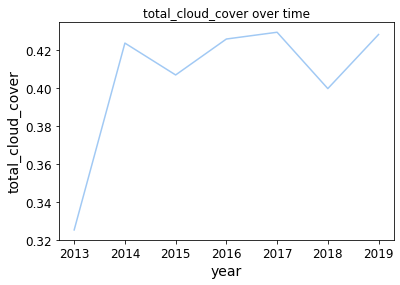

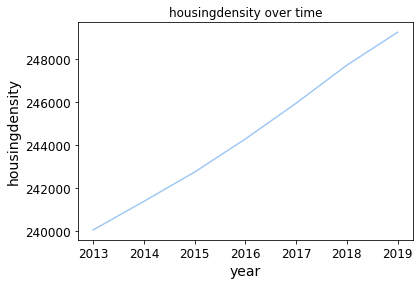

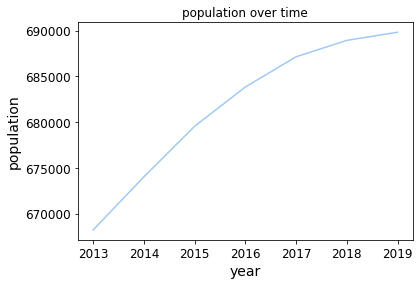

In [78]:
feature_list = ['2m_temperature', 'total_precipitation', 'low_vegetation_cover', 'high_vegetation_cover', 
                '10m_wind_speed', 'volumetric_soil_water_layer_1', 'total_cloud_cover', 'housingdensity', 
                'population'] #df.columns
for i in feature_list:
    temp = df.groupby(df.year)[i].apply(func=np.average).to_frame().reset_index()
    lp = sns.lineplot(x=temp.year, y=temp[i])
    lp.set_title(f"{i} over time")
    plt.show()
    
#sns.lineplot(x=temp0.year,y=temp0["2m_temperature"])
#sns.lineplot(x=temp.year,y=temp.total_precipitation)
#plt.show()

Vegetation cover doesn't have much of a change over time throughout the years. 2m_temperature begins decreasing from 2014, and all other features seem to have a upward trend.

### *Heat map of correlations between features
- removed vegetation cover because it doesn't have much change

<AxesSubplot:>

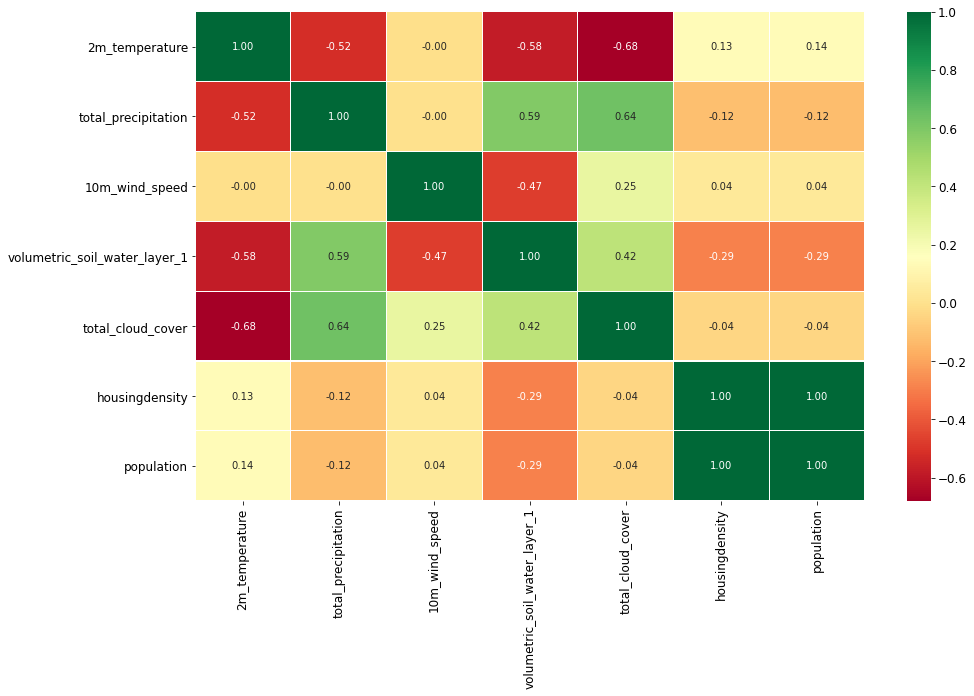

In [81]:
df_features = df[['2m_temperature', 'total_precipitation', '10m_wind_speed', 'volumetric_soil_water_layer_1', 
                  'total_cloud_cover', 'housingdensity', 'population']]
corr_matrix = df_features.corr()
plt.figure(figsize=(15,9))
sns.heatmap(corr_matrix, annot=True, linewidths=0.05, fmt= '.2f',cmap='RdYlGn')

Negative correlations
- (2m_temperature, total_precipitation)
- (2m_temperature, volumetric_soil_water_layer_1)
- (2m_temperature, total_cloud_cover)
 
Positive correlations
- (total_precipitation, volumetric_soil_water_later_1)
- (total_precipitation, total_cloud_cover)
- (housingdensity, population)

### *Scatter matrix on highly correlated features based on heatmap (climate only)

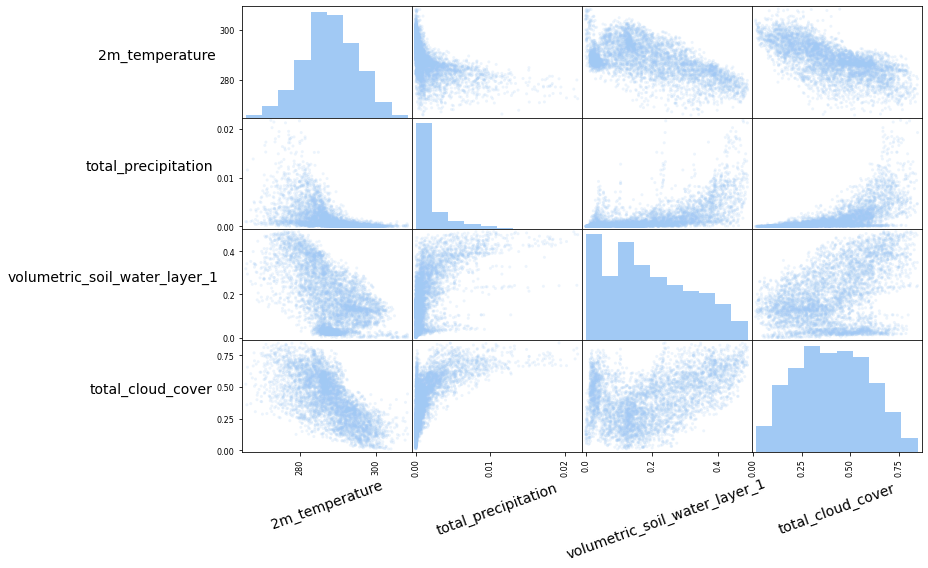

In [102]:
#from pandas.plotting import scatter_matrix
attributes = ["2m_temperature", "total_precipitation", "volumetric_soil_water_layer_1", "total_cloud_cover"]
#scatter_matrix(df[attributes], figsize=(12, 8))
axes = pd.plotting.scatter_matrix(df[attributes], alpha=0.2, figsize=[13,8])
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(20)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')
    
plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0) #spacing
plt.show()


### *Distribution of Fire Count on Summer Temperatures

In [212]:
#summer_df = df[(df['time'].str.slice(5,7) == '06') | (df['time'].str.slice(5,7) == '07') | (df['time'].str.slice(5,7) == '08')]
df['summer_temp'] = (df['2m_temperature'] >= 285).astype(int)
df['summer_temp'].value_counts()

1    3183
0    1521
Name: summer_temp, dtype: int64

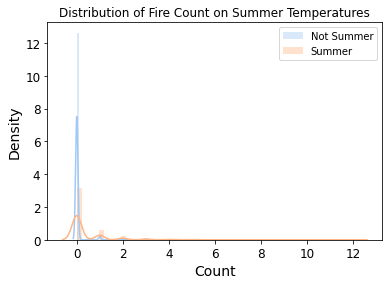

In [214]:
sns.distplot(df[df['summer_temp'] == 0]['count'], label='Not Summer')
sns.distplot(df[df['summer_temp'] == 1]['count'], label='Summer')
plt.title("Distribution of Fire Count on Summer Temperatures")
plt.xlabel("Count")
plt.ylabel('Density')
plt.legend()

In [244]:
df['summer_temp'].value_counts()

1    3183
0    1521
Name: summer_temp, dtype: int64

In [245]:
df['count'].value_counts()

0     3901
1      494
2      158
3       69
4       40
5       22
6       10
7        5
8        3
12       2
Name: count, dtype: int64

In [261]:
df_count_summer_less = df[df['count'] <= 2]

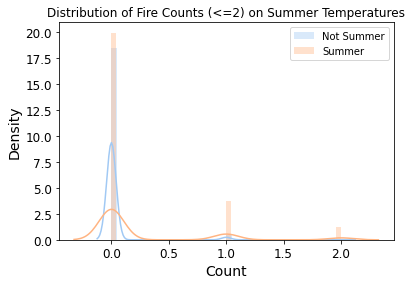

In [262]:
sns.distplot(df_count_summer_less[df_count_summer_less['summer_temp'] == 0]['count'], label='Not Summer')
sns.distplot(df_count_summer_less[df_count_summer_less['summer_temp'] == 1]['count'], label='Summer')
plt.title("Distribution of Fire Counts (<=2) on Summer Temperatures")
plt.xlabel("Count")
plt.ylabel('Density')
plt.legend();

The distribution of frequency on summer temperature is right skewed, as well as the frequency on not summer temperatures. Lets check fire counts of above 2.

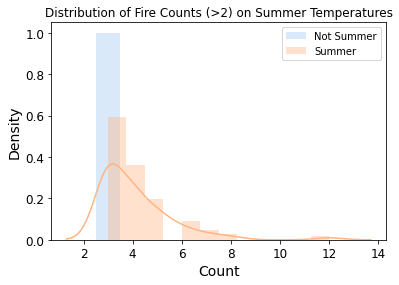

In [263]:
df_count_summer = df[df['count'] > 2]
sns.distplot(df_count_summer[df_count_summer['summer_temp'] == 0]['count'], label='Not Summer')
sns.distplot(df_count_summer[df_count_summer['summer_temp'] == 1]['count'], label='Summer')
plt.title("Distribution of Fire Counts (>2) on Summer Temperatures")
plt.xlabel("Count")
plt.ylabel('Density')
plt.legend();

The distribution of frequency on summer temperature is right skewed, as well as the frequency on not summer temperatures. More fires occur in summer.

### *TotalCloudCover vs FireFreqs on Summer temperatures
- cloudcover is highly (-)correlated to temperature based on previous visualization

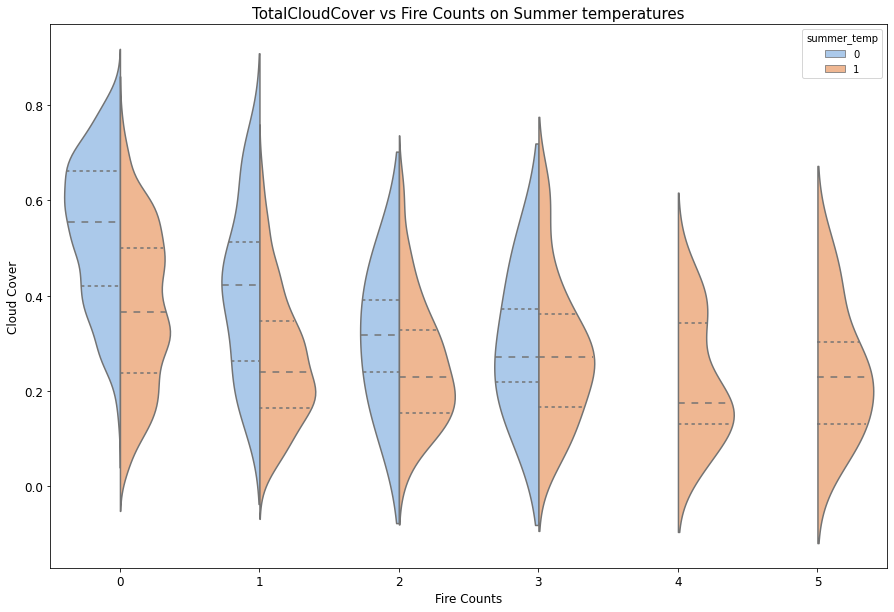

In [273]:
df_freq = df[df['count'] <= 5]
plt.figure(figsize=(15, 10))
sns.violinplot(y='total_cloud_cover', x='count', data=df_freq, hue='summer_temp', split=True, inner='quartile')
plt.title("TotalCloudCover vs Fire Counts on Summer temperatures", fontsize=15)
plt.xlabel("Fire Counts", fontsize=12)
plt.ylabel("Cloud Cover",fontsize=12);

When fire count on summer temperaturs increases (4+) cloud coverage descreases.

### *Spatial representation ? [WIP]

In [290]:
df_2019 = df[df.year == 2019] #grab the most updated human trigger info

In [314]:
df_2019_pop_dens = df_2019.groupby(['county', 'population', 'housingdensity'])['count'].apply(func=np.sum).to_frame().reset_index()

In [344]:
df_2019_pop_dens10 = df_2019_pop_dens.sort_values(by=['population', 'housingdensity'], ascending=False)[:10]
df_2019_pop_dens10

,county,population,housingdensity,count
17,Los Angeles,10039107,3579329,6
35,San Diego,3338330,1233777,16
28,Orange,3175692,1118110,0
31,Riverside,2470546,857148,32
34,San Bernardino,2180085,731400,7
40,Santa Clara,1927852,686266,11
0,Alameda,1671329,622922,9
32,Sacramento,1552058,578937,2
5,Contra Costa,1153526,418707,9
8,Fresno,999101,336473,3


<AxesSubplot:xlabel='county'>

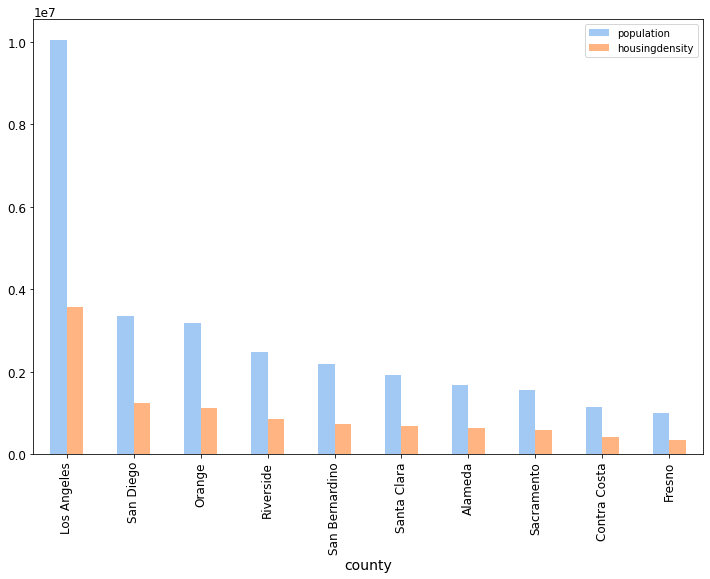

In [343]:
df_2019_pop_dens10.plot(x="county", y=["population", "housingdensity"], kind="bar", figsize=[12,8])